In [1]:
# Indivíduo modelo

coeffs={
    'A': {
        'J': {'n': 19.72509301258893, 'k': 0.5206758514113475, '-': True}, 
        'tau': 1.375789134684469
        }, 
    'B': {
        'E': {'n': 5.189878043566109, 'k': 0.5754831266614687, '-': False}, 
        'tau': 1.4074283669383645
        }, 
    'C': {
        'A': {'n': 3.441510247433408, 'k': 0.6625784952512888}, 
        'B': {'n': 22.980176367907088, 'k': 1.2675123807509632}, 
        'F': {'n': 15.426678656253328, 'k': 0.7557521656269088}, 
        'tau': 1.3301597895492123
        }, 
    'D': {
        'F': {'n': 5.71704404210993, 'k': 0.5193805408839007, '-': False}, 
        'tau': 1.7281577235162313
        }, 
    'E': {
        'J': {'n': 13.105583817133082, 'k': 0.504132731526863, '-': True}, 
        'tau': 1.3543621018895355
        }, 
    'F': {
        'A': {'n': 5.262571155020994, 'k': 0.6013869225085854, '-': False}, 'tau': 1.3911712095350162}, 
    'G': {
        'A': {'n': 7.579403994657755, 'k': 0.6010073667760679}, 
        'B': {'n': 23.445605400915074, 'k': 1.5362449507851197}, 
        'F': {'n': 10.084933976296922, 'k': 1.7636395138880596}, 
        'tau': 2.058823473840616
        }, 
    'H': {
        'F': {'n': 4.763664296540125, 'k': 0.5003211687201297, '-': False}, 
        'tau': 1.6734547512710032
        }, 
    'I': {'G': {'n': 13.547910166303655, 'k': 0.42877832202955113}, 
          'H': {'n': 27.7981916900904, 'k': 0.5046914293068021}, 
          'tau': 4.997823762000716
        }, 
    'J': {'I': {'n': 2.5826355428260803, 'k': 0.20151153688524667, '-': False}, 
          'tau': 2.045689011192476
        }
    }

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Helpers.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['t'] + labels)


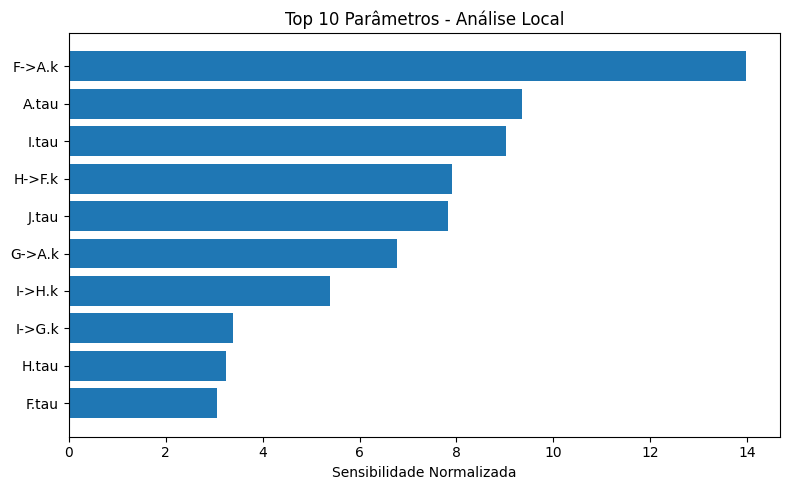

[INFO] Executando análise de Morris com 615 amostras...


c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Equations.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))
C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ode.py:1348: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


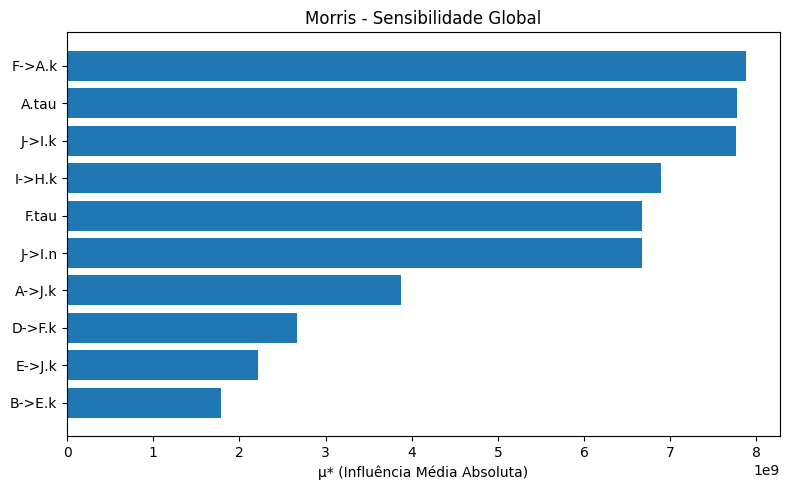

[INFO] Gerando 40 parâmetros e 8 amostras (second_order=True)...
[INFO] Calculando índices de Sobol...


C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))



=== Resultados da Análise de Sobol ===
A->J.n                    | S1=-11253745.6222 | ST=0.0016
A->J.k                    | S1=-69375249.7616 | ST=0.0240
A.tau                     | S1=252440535.4038 | ST=0.0831
B->E.n                    | S1=-4813690.0942 | ST=0.0001
B->E.k                    | S1=-18834533.6424 | ST=0.0020
B.tau                     | S1=-4677035.8740 | ST=0.0001
C->A.n                    | S1=-2196895.4658 | ST=0.0001
C->A.k                    | S1=-930318.8141 | ST=0.0001
C->B.n                    | S1=-719741.3658 | ST=0.0000
C->B.k                    | S1=2873997.2207 | ST=0.0001
C->F.n                    | S1=-6478109.0698 | ST=0.0000
C->F.k                    | S1=-17184091.2904 | ST=0.0007
C.tau                     | S1=-2574646.3838 | ST=0.0001
D->F.n                    | S1=-1644163.7871 | ST=0.0001
D->F.k                    | S1=10712533.7734 | ST=0.0006
D.tau                     | S1=7156575.7398 | ST=0.0001
E->J.n                    | S1=-55471187.2622 |

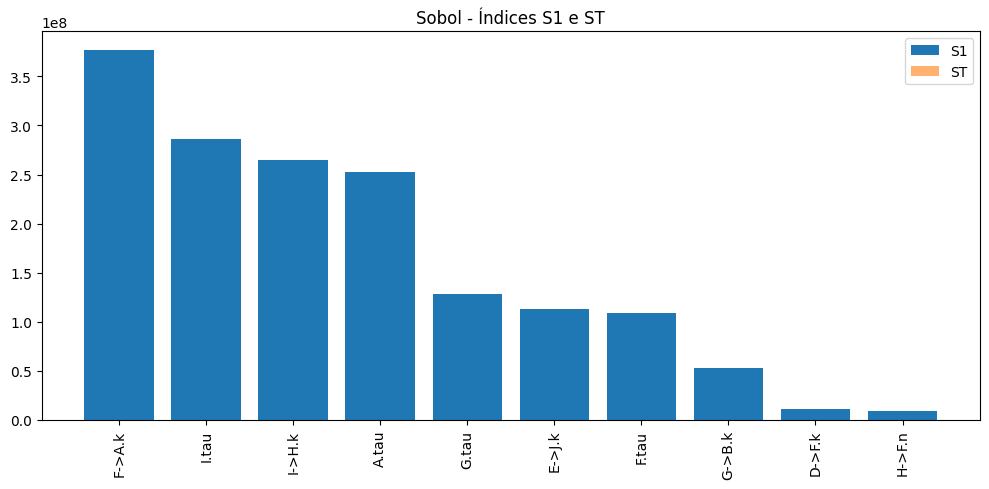

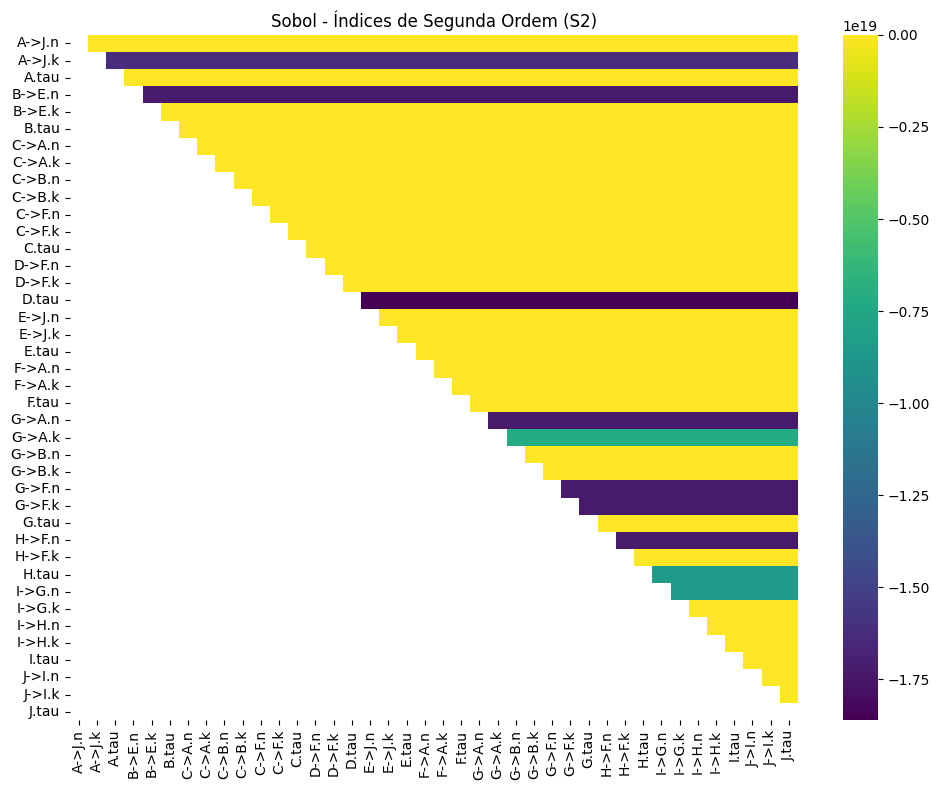

In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../..")) 

from Modules.Models import ModelWrapper
from Modules.Sensitivity import SensitivityAnalyzer

model = ModelWrapper.GRN10()
analyzer = SensitivityAnalyzer(model)
best_params = coeffs

# Análise local
local_results = analyzer.local_sensitivity(best_params)
analyzer.plot_local(local_results)

# Aanálise de Morris
morris_results = analyzer.morris_sensitivity(best_params, num_trajectories=15)
analyzer.plot_global(morris_results, method="morris")

# Análise de Sobol
sobol_results = analyzer.sobol_sensitivity(best_params, N=512, second_order=True)
problem = analyzer._build_problem(best_params)
analyzer.plot_global(sobol_results, method="sobol")

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Equations.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))
C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ode.py:1348: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


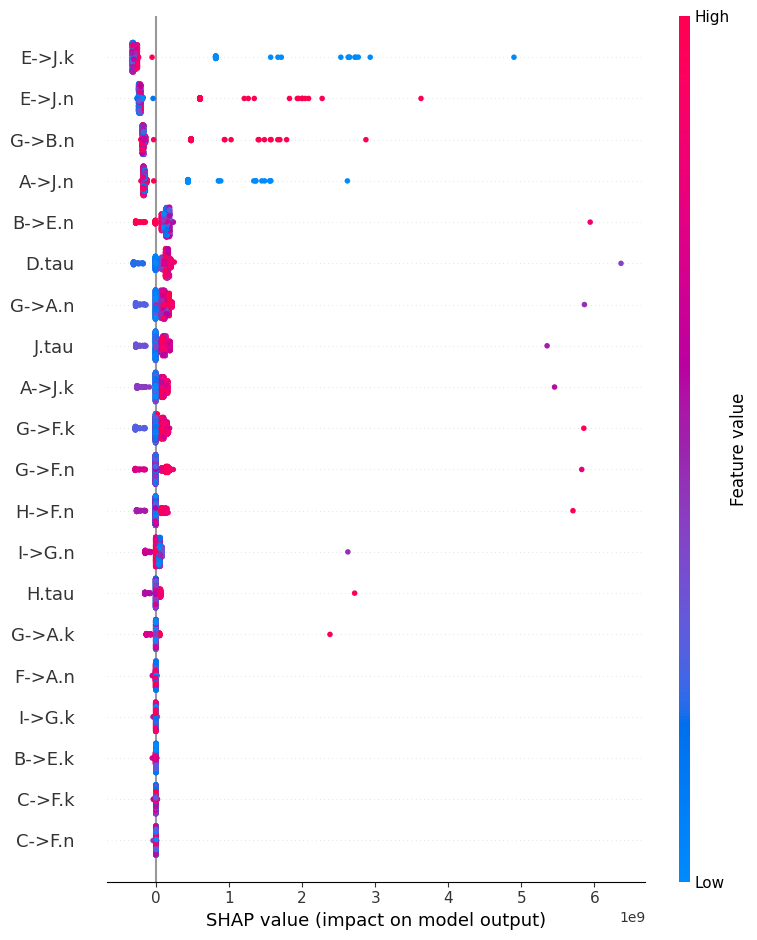

In [ ]:
# SHAP – Análise de Importância Global
shap_values = analyzer.shap_sensitivity(best_params, N=32)
analyzer.plot_shap_summary()